In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



sns.set(rc = {'figure.figsize':(12,7)})


In [217]:
import glob
files = glob.glob("./data/*.csv")

In [218]:
dfss=[]
for f in files:
    df = pd.read_csv(f, header=0, sep=";")
    df['day']= f[7:13]
    dfss.append(df)

In [219]:
all_days = pd.concat(dfss)
all_days.head(5)
all_days.to_csv("all.csv")

all_days['customer']= all_days['customer_no'].map(str) + all_days['day']

In [220]:
all_days.head(3)

,timestamp,customer_no,location,day,customer
0,2019-09-02 07:03:00,1,dairy,monday,1monday
1,2019-09-02 07:03:00,2,dairy,monday,2monday
2,2019-09-02 07:04:00,3,dairy,monday,3monday


In [221]:
f = all_days['day'].to_list()
f[1]

'monday'

### Calculate the total number of customers in each section

In [222]:
x = all_days.groupby('location')[['customer']].count()

In [223]:
x

,customer
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


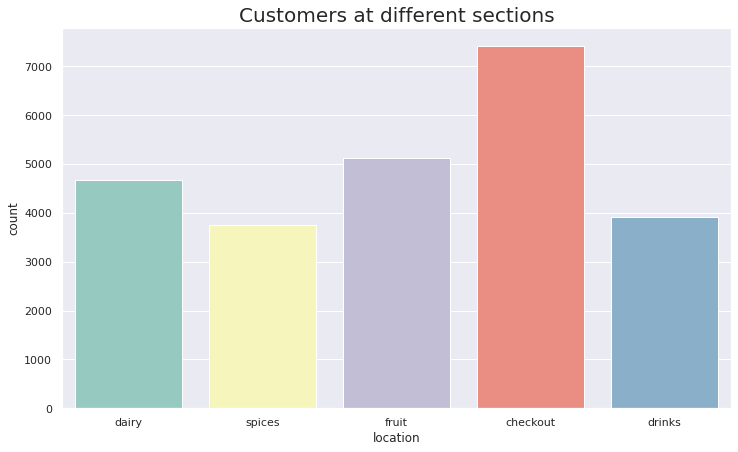

In [231]:
sns_plot = sns.countplot(x = 'location', data = all_days, palette = 'Set3').set_title('Customers at different sections', fontsize=20)

sns_plot.figure.savefig("cust_at_sec.png")

### Calculate the total number of customers in each section over time

In [244]:
all_days['timestamp']=pd.to_datetime(all_days['timestamp'])
all_days['timestamp']

0      2019-09-02 07:03:00
1      2019-09-02 07:03:00
2      2019-09-02 07:04:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
               ...        
5099   2019-09-05 21:48:00
5100   2019-09-05 21:48:00
5101   2019-09-05 21:48:00
5102   2019-09-05 21:49:00
5103   2019-09-05 21:49:00
Name: timestamp, Length: 24877, dtype: datetime64[ns]

In [245]:
y = all_days.groupby(['location',pd.Grouper(key = 'timestamp',freq='1H')])

In [246]:
y_new = y.count().unstack(level = 0)

In [247]:
y_new.columns 

MultiIndex([('customer_no', 'checkout'),
            ('customer_no',    'dairy'),
            ('customer_no',   'drinks'),
            ('customer_no',    'fruit'),
            ('customer_no',   'spices'),
            (        'day', 'checkout'),
            (        'day',    'dairy'),
            (        'day',   'drinks'),
            (        'day',    'fruit'),
            (        'day',   'spices'),
            (   'customer', 'checkout'),
            (   'customer',    'dairy'),
            (   'customer',   'drinks'),
            (   'customer',    'fruit'),
            (   'customer',   'spices'),
            (       'hour', 'checkout'),
            (       'hour',    'dairy'),
            (       'hour',   'drinks'),
            (       'hour',    'fruit'),
            (       'hour',   'spices')],
           names=[None, 'location'])

In [248]:
y_new.columns = y_new.columns.droplevel(0)
y_new = y_new.reset_index()

y_new.columns

Index(['timestamp', 'checkout', 'dairy', 'drinks', 'fruit', 'spices',
       'checkout', 'dairy', 'drinks', 'fruit', 'spices', 'checkout', 'dairy',
       'drinks', 'fruit', 'spices', 'checkout', 'dairy', 'drinks', 'fruit',
       'spices'],
      dtype='object', name='location')

In [249]:
#removing duplicated columns

In [250]:
y_new = y_new.loc[:,~y_new.columns.duplicated()]

In [251]:
y_new.head(10)

location,timestamp,checkout,dairy,drinks,fruit,spices
0,2019-09-02 07:00:00,92,59,60,54,52
1,2019-09-02 08:00:00,112,68,65,68,51
2,2019-09-02 09:00:00,85,50,57,76,40
3,2019-09-02 10:00:00,90,58,35,47,52
4,2019-09-02 11:00:00,55,36,24,41,33
5,2019-09-02 12:00:00,73,55,37,54,46
6,2019-09-02 13:00:00,120,76,50,95,71
7,2019-09-02 14:00:00,90,58,43,64,50
8,2019-09-02 15:00:00,94,67,48,79,54
9,2019-09-02 16:00:00,86,49,54,66,52


### Display the number of customers at checkout over time

In [252]:
#y_new['checkout'].plot()
#y_new['dairy'].plot()
#y_new['drinks'].plot()
#y_new['fruit'].plot()
#y_new['spices'].plot()

In [253]:
#y_new['timestamp'].dt.hour

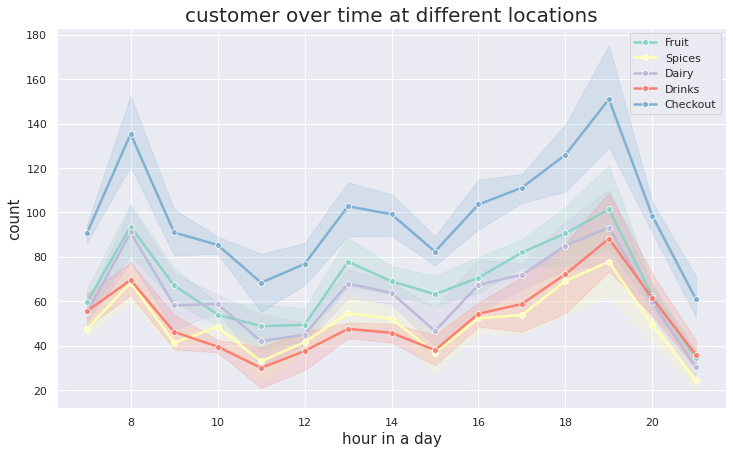

In [255]:
sns.set_palette("Set3")
sns2 = sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['fruit'], marker='o', linewidth=2.5, label='Fruit')
sns2 = sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['spices'], marker='o', linewidth=2.5, label='Spices')
sns2 = sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['dairy'], marker='o', linewidth=2.5, label='Dairy')
sns2 = sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['drinks'], marker='o', linewidth=2.5, label='Drinks')
sns2 = sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['checkout'], marker='o', linewidth=2.5, label='Checkout')

plt.title("customer over time at different locations", fontsize = 20) # for title
plt.xlabel("hour in a day", fontsize = 15) # label for x-axis
plt.ylabel("count", fontsize = 15) # label for y-axis
plt.show()

sns2.figure.savefig("cust_time_sec.png")

In [243]:
all_days['timestamp']=pd.to_datetime(all_days["timestamp"])

all_days['hour'] = all_days['timestamp'].dt.hour

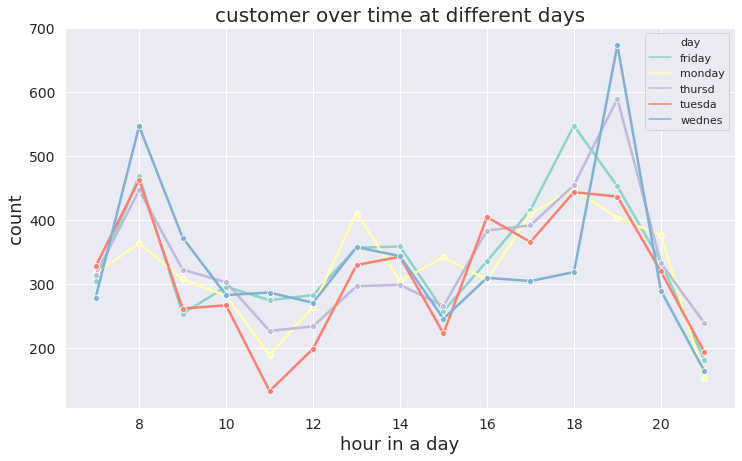

In [256]:
sns.color_palette("husl", 8)
y2 = all_days.groupby(['day','hour'])['customer'].count().reset_index()

sns3= sns.lineplot(x=y2['hour'], y=y2['customer'], hue = y2['day'],  marker='o', linewidth=2.5)
plt.title("customer over time at different days", fontsize = 20) # for title
plt.xlabel("hour in a day", fontsize = 18) # label for x-axis
plt.ylabel("count", fontsize = 18) # label for y-axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

sns3.figure.savefig("cust_time_days.png")

In [131]:
y2['day'][50]

'tuesda'

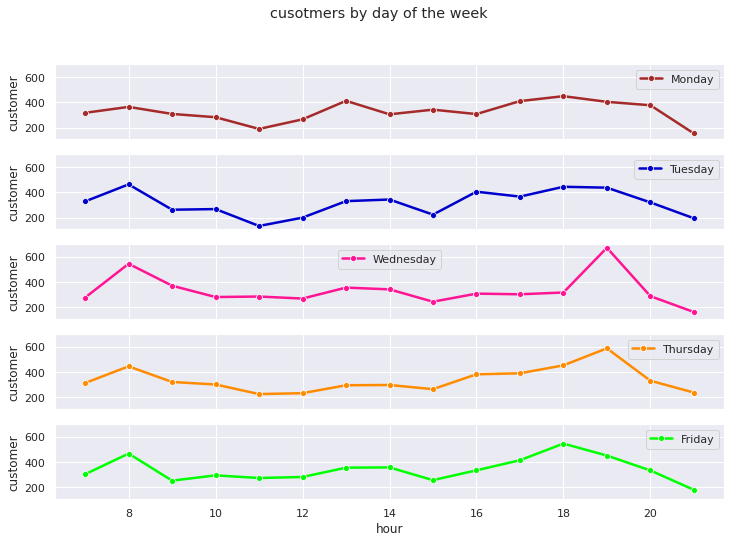

In [257]:
fig, axes =  plt.subplots(5, 1, figsize=(12, 8), sharey=True, sharex=True)
fig.suptitle('cusotmers by day of the week')
sns.color_palette("husl", 8)
sns4 = sns.lineplot(data=y2[y2.day=='monday'], x='hour', y='customer', ax=axes[0],marker='o', linewidth=2.5, label='Monday', color = 'brown')
sns4 = sns.lineplot(data=y2[y2.day=='tuesda'], x='hour', y='customer', ax=axes[1], marker='o', linewidth=2.5, label='Tuesday', color = 'mediumblue')
sns4 = sns.lineplot(data=y2[y2.day=='wednes'], x='hour', y='customer', ax=axes[2], marker='o', linewidth=2.5,label='Wednesday',color = 'deeppink')
sns4 = sns.lineplot(data=y2[y2.day=='thursd'], x='hour', y='customer', ax=axes[3], marker='o', linewidth=2.5,label='Thursday', color = 'darkorange')
sns4 = sns.lineplot(data=y2[y2.day=='friday'], x='hour', y='customer', ax=axes[4], marker='o', linewidth=2.5, label='Friday',color = 'lime')

#plt.title("customer over time at different days", fontsize = 20) # for title
#plt.xlabel("hour in a day", fontsize = 18) # label for x-axis
#plt.ylabel("count", fontsize = 18) # label for y-axis
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.show()

sns4.figure.savefig("cust_sub_days.png")

### Calculate the time each customer spent in the market

In [261]:
difference=all_days.groupby('customer')[['timestamp']].agg(lambda x: x.max() - x.min())


In [262]:
difference

,timestamp
customer,
1000friday,0 days 00:01:00
1000monday,0 days 00:07:00
1000thursd,0 days 00:10:00
1000tuesda,0 days 00:04:00
1000wednes,0 days 00:13:00
...,...
9friday,0 days 00:03:00
9monday,0 days 00:07:00
9thursd,0 days 00:02:00


### Calculate the total number of customers in the supermarket over time.

In [263]:
y_new['total_overtime'] = y_new['fruit']+ y_new['dairy']+ y_new['spices'] + y_new['drinks']

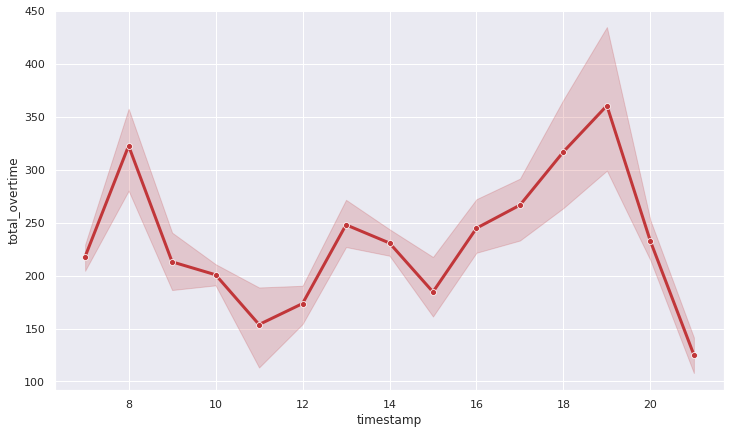

In [264]:
sns.set_palette("RdBu")
sns5 = sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['total_overtime'], marker='o', linewidth=3)
sns5.figure.savefig("total_cust_times.png")

### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [265]:
entrance_first = all_days.sort_values('timestamp').groupby('customer').first()

In [266]:
entrance_first.reset_index(level=0, inplace=True)
entrance_first

,customer,timestamp,customer_no,location,day,hour
0,1000friday,2019-09-06 17:19:00,1000,fruit,friday,17
1,1000monday,2019-09-02 17:44:00,1000,dairy,monday,17
2,1000thursd,2019-09-05 17:23:00,1000,spices,thursd,17
3,1000tuesda,2019-09-03 17:53:00,1000,fruit,tuesda,17
4,1000wednes,2019-09-04 16:53:00,1000,spices,wednes,16
...,...,...,...,...,...,...
7440,9friday,2019-09-06 07:06:00,9,fruit,friday,7
7441,9monday,2019-09-02 07:06:00,9,dairy,monday,7
7442,9thursd,2019-09-05 07:07:00,9,fruit,thursd,7
7443,9tuesda,2019-09-03 07:10:00,9,fruit,tuesda,7


In [267]:
entrance_first.set_index('timestamp', drop=False, inplace=True)
entrance_first

,customer,timestamp,customer_no,location,day,hour
timestamp,,,,,,
2019-09-06 17:19:00,1000friday,2019-09-06 17:19:00,1000,fruit,friday,17
2019-09-02 17:44:00,1000monday,2019-09-02 17:44:00,1000,dairy,monday,17
2019-09-05 17:23:00,1000thursd,2019-09-05 17:23:00,1000,spices,thursd,17
2019-09-03 17:53:00,1000tuesda,2019-09-03 17:53:00,1000,fruit,tuesda,17
2019-09-04 16:53:00,1000wednes,2019-09-04 16:53:00,1000,spices,wednes,16
...,...,...,...,...,...,...
2019-09-06 07:06:00,9friday,2019-09-06 07:06:00,9,fruit,friday,7
2019-09-02 07:06:00,9monday,2019-09-02 07:06:00,9,dairy,monday,7
2019-09-05 07:07:00,9thursd,2019-09-05 07:07:00,9,fruit,thursd,7


<AxesSubplot:xlabel='hour,location'>

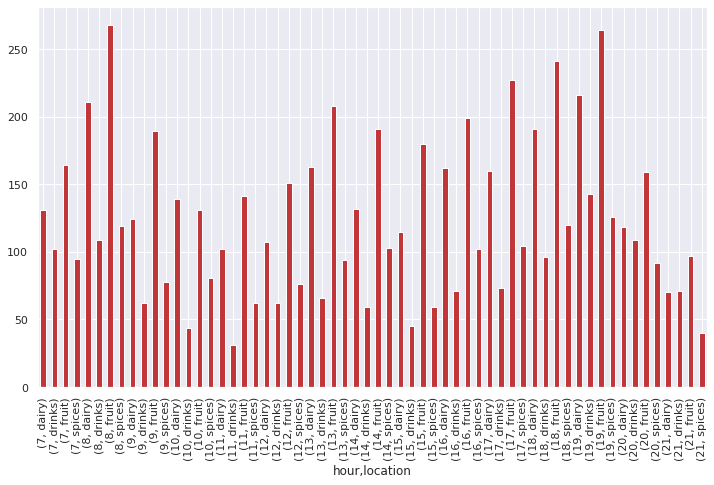

In [268]:

# Getting the histogram
entrance_first.groupby(['hour', 'location'])['customer'].count().plot(kind='bar')
#entrance_first.groupby('location').count().hist()

### Distribution of first section visit

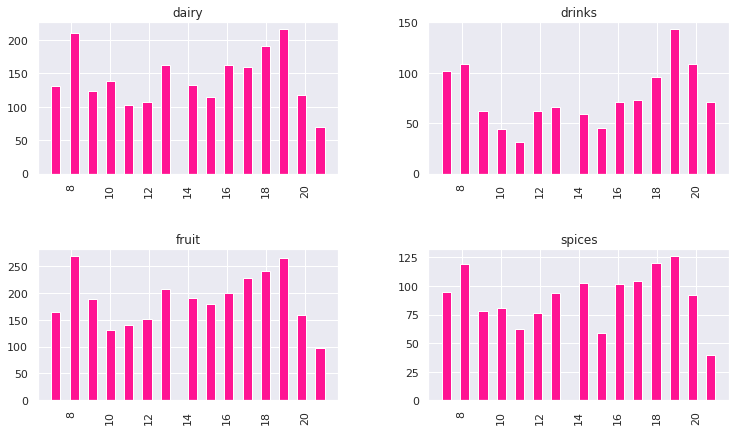

In [277]:
ax = entrance_first['hour'].hist(by=entrance_first['location'], bins=30, color ='deeppink' )



In [76]:
#entrance_first_count = entrance_first.groupby(['location',pd.Grouper(key = 'timestamp',freq='1H')])

In [192]:
entrance_follow = all_days.groupby('customer').apply(pd.DataFrame.sort_values, 'timestamp')

In [193]:
entrance_follow = entrance_follow.reset_index(drop =True)

In [194]:
entrance_follow['firsts'] = entrance_follow.duplicated('customer')

In [161]:
#firsts = df[df['firsts'] == False]
following = entrance_follow[entrance_follow['firsts'] == True]
following

,timestamp,customer_no,location,day,customer,hour,firsts
1,2019-09-06 17:20:00,1000,checkout,friday,1000friday,17,True
3,2019-09-02 17:50:00,1000,drinks,monday,1000monday,17,True
4,2019-09-02 17:51:00,1000,checkout,monday,1000monday,17,True
6,2019-09-05 17:26:00,1000,dairy,thursd,1000thursd,17,True
7,2019-09-05 17:29:00,1000,drinks,thursd,1000thursd,17,True
...,...,...,...,...,...,...,...
24871,2019-09-03 07:13:00,9,dairy,tuesda,9tuesda,7,True
24872,2019-09-03 07:21:00,9,fruit,tuesda,9tuesda,7,True
24873,2019-09-03 07:23:00,9,dairy,tuesda,9tuesda,7,True
24874,2019-09-03 07:30:00,9,checkout,tuesda,9tuesda,7,True


### Distribution of following visits

array([[<AxesSubplot:title={'center':'checkout'}>,
        <AxesSubplot:title={'center':'dairy'}>],
       [<AxesSubplot:title={'center':'drinks'}>,
        <AxesSubplot:title={'center':'fruit'}>],
       [<AxesSubplot:title={'center':'spices'}>, <AxesSubplot:>]],
      dtype=object)

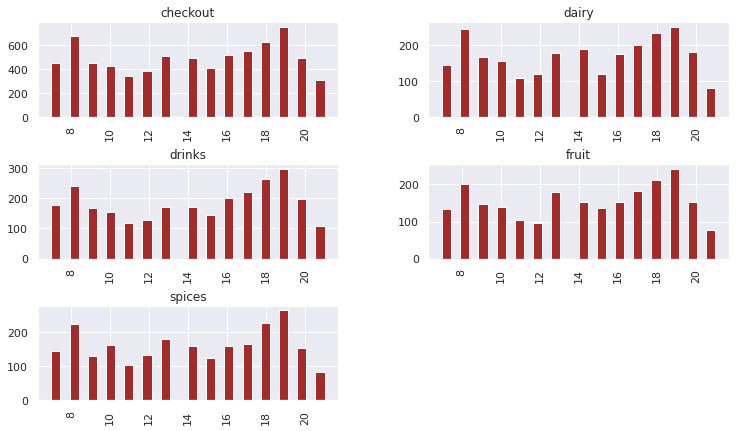

In [162]:
following['hour'].hist(by=following['location'], bins=30, color ='brown' )

In [163]:
#all_orders = []
#for i in range(0,1447):
 #   k = i
 #   movement = entrance_new.loc[entrance_new['customer_no']==k]['location'].to_list()
 #   all_orders.append(movement)
#

In [164]:
#all_orders

In [165]:
#entrance_new.loc[entrance_new['customer_no']==6]['location'].to_list()


In [166]:
#entrance_new.loc[entrance_new['customer_no']==6].groupby('location').to_list()

#df[df['model'] == 'ELO'].sort_values('Match_no')

In [167]:
# List of lists

# Iterate over the list and add the size of all internal lists 
#count = 0
#for element in all_orders:

#if element[0] = spices
#    count += len(listElem)                    

In [195]:
entrance_follow['before'] = entrance_follow['location'].shift(1)

In [196]:
#entrance_new['dummy'] = True
# pd.crosstab :
MC_matrix = pd.crosstab(entrance_follow['location'], entrance_follow['before'], normalize=0)

In [197]:
MC_matrix.checkout = 0

In [198]:
MC_matrix

before,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0,0.246056,0.282594,0.344479,0.126871
dairy,0,0.000641,0.022654,0.260953,0.259243
drinks,0,0.267350,0.000256,0.179001,0.262228
fruit,0,0.173989,0.167155,0.000195,0.112283
spices,0,0.244006,0.225360,0.172083,0.000266


In [174]:
MC_matrix.shape

(5, 5)

### Revenue customer example¶


In [199]:
entrance_follow = entrance_follow.drop(columns=['before', 'firsts'], axis = 1)
prices = {  'fruit' : 4,
            'spices' : 3,
            'dairy' : 5,
            'drinks' : 6,
            'checkout' : 0}



entrance_follow['prices'] = entrance_follow['location'].map(prices)


In [201]:
#keeping all locations except checkout

entrance_follow2 = entrance_follow[entrance_follow.prices != 0]
entrance_follow2

,timestamp,customer_no,location,day,customer,hour,prices
0,2019-09-06 17:19:00,1000,fruit,friday,1000friday,17,4
2,2019-09-02 17:44:00,1000,dairy,monday,1000monday,17,5
3,2019-09-02 17:50:00,1000,drinks,monday,1000monday,17,6
5,2019-09-05 17:23:00,1000,spices,thursd,1000thursd,17,3
6,2019-09-05 17:26:00,1000,dairy,thursd,1000thursd,17,5
...,...,...,...,...,...,...,...
24870,2019-09-03 07:10:00,9,fruit,tuesda,9tuesda,7,4
24871,2019-09-03 07:13:00,9,dairy,tuesda,9tuesda,7,5
24872,2019-09-03 07:21:00,9,fruit,tuesda,9tuesda,7,4
24873,2019-09-03 07:23:00,9,dairy,tuesda,9tuesda,7,5


<AxesSubplot:xlabel='location'>

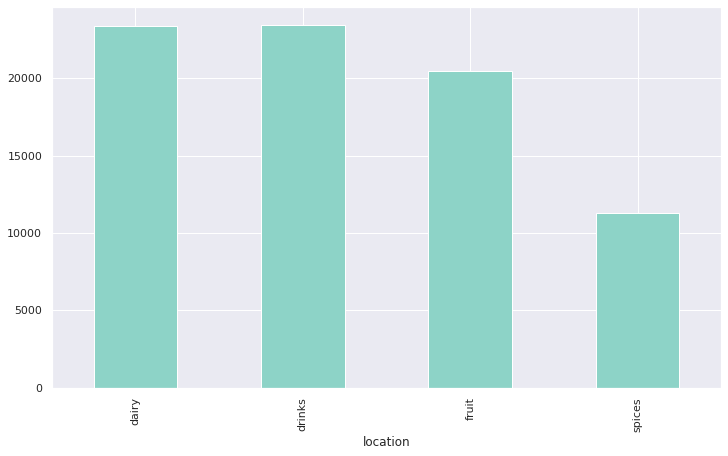

In [203]:
#revenue per section
#entrance_follow.groupby('location')['price'].sum().astype(int).plot(kind = 'bar')

#ax = sns.barplot(x='location', y='price', data=entrance_follow, ci=None, estimator=sum)

entrance_follow2.groupby('location')['prices'].sum().plot.bar()

In [206]:
#entrance_follow2

<AxesSubplot:xlabel='location', ylabel='prices'>

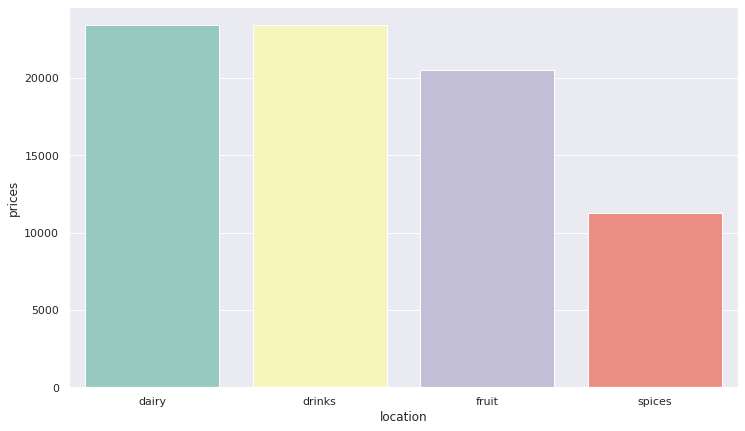

In [209]:
sns_plot = entrance_follow2.groupby('location', as_index=False).prices.sum()
sns.barplot(x='location', y='prices', ci="sd", data=sns_plot)
#sns_plot